# Spam SMS Detection

In this project, we build a Spam SMS Detection system using Natural Language Processing (NLP) and Machine Learning.

We will:
* Load and clean real-world SMS data  
* Perform Exploratory Data Analysis (EDA)  
* Convert text into numerical features using TF-IDF with N-grams  
* Train multiple classification models  
* Evaluate them using Accuracy, Precision, Recall, F1-Score and ROC-AUC  
* Select the best model for deployment  
* Build a smart spam prediction function with probability thresholding  

The goal is not just high accuracy, but a reliable and production-ready spam filter.


Dataset Link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# 1. IMPORTS & SETUP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import pickle

# NLP Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Configuration
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported. Ready for Elite Spam Detection.")

Libraries imported. Ready for Elite Spam Detection.


# 2. LOAD DATA

In [2]:
print("\nLoading dataset...")
try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
except:
    df = pd.read_csv('spam.csv')

# Drop junk columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')

# Rename columns
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Convert Label to Numerical (ham=0, spam=1)
df['target'] = df['label'].map({'ham': 0, 'spam': 1})

print(f"Data Shape: {df.shape}")
print(df.head())


Loading dataset...
Data Shape: (5572, 3)
  label                                               text  target
0   ham  Go until jurong point, crazy.. Available only ...       0
1   ham                      Ok lar... Joking wif u oni...       0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       1
3   ham  U dun say so early hor... U c already then say...       0
4   ham  Nah I don't think he goes to usf, he lives aro...       0


# 3. EDA & TEXT CLEANING

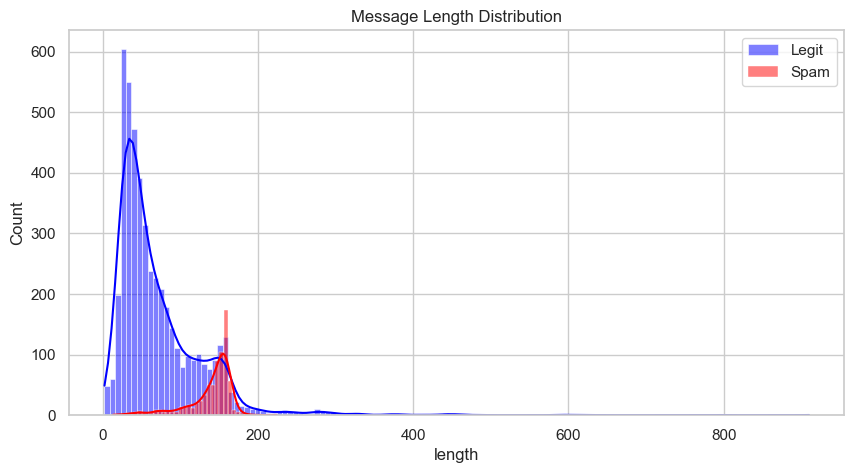

Text cleaning complete.


In [3]:
# Feature: Text Length
df['length'] = df['text'].apply(len)

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df[df['target'] == 0]['length'], label='Legit', color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['length'], label='Spam', color='red', kde=True)
plt.title('Message Length Distribution')
plt.legend()
plt.show()

# Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) # Remove numbers & punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
print("Text cleaning complete.")

# 4. Feature Extraction (TF-IDF with N-grams)

In [4]:
# 1. Setup TF-IDF with N-grams
# max_features=5000: Keep top 5k terms (unigrams + bigrams)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))

# 2. Fit and Transform (Keep as Sparse Matrix!)
X = tfidf.fit_transform(df['clean_text'])
y = df['target']

print(f"Feature Matrix: {X.shape} (Sparse Matrix)")
# Note: (Rows, Features). Features increased because we added Bigrams.

# 3. Stratified Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape:  {X_test.shape}")

Feature Matrix: (5572, 5000) (Sparse Matrix)
Train Shape: (4457, 5000)
Test Shape:  (1115, 5000)


# 5. Model Training (Benchmarking)

In [5]:
from sklearn.svm import LinearSVC

# 1. Naive Bayes
print("Training Naive Bayes...")
nb = MultinomialNB()
nb.fit(X_train, y_train)

# 2. Logistic Regression (Solver='liblinear' is good for sparse high-dim data)
print("Training Logistic Regression...")
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

# 3. Linear SVC (Industry Standard for Text Accuracy)
print("Training Linear SVC...")
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

print("Training Complete.")

Training Naive Bayes...
Training Logistic Regression...
Training Linear SVC...
Training Complete.


# 6. Professional Evaluation


--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[965   1]
 [ 35 114]]


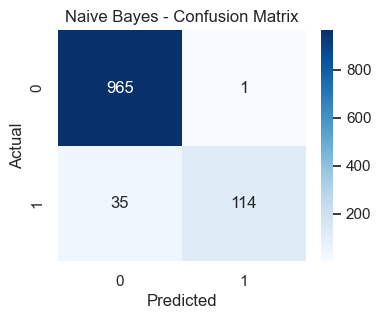

Accuracy: 0.967713004484305
Precision: 0.991304347826087
Recall: 0.7651006711409396
F1 Score: 0.8636363636363636
ROC-AUC Score: 0.9823

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.71      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Confusion Matrix:
[[965   1]
 [ 43 106]]


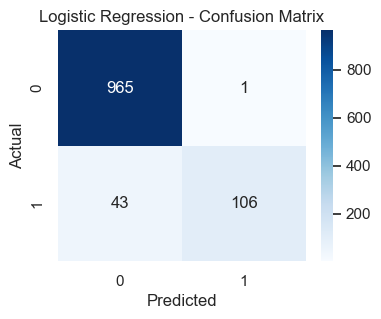

Accuracy: 0.9605381165919282
Precision: 0.9906542056074766
Recall: 0.7114093959731543
F1 Score: 0.828125
ROC-AUC Score: 0.9855

--- Linear SVC ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[965   1]
 [ 17 132]]


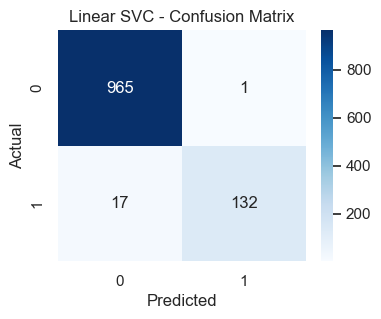

Accuracy: 0.9838565022421525
Precision: 0.9924812030075187
Recall: 0.8859060402684564
F1 Score: 0.9361702127659575
ROC-AUC Score: 0.9872

Selection: We will use Logistic Regression for deployment because it has high Accuracy AND gives calibrated probabilities.


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name, has_proba=True):
    print(f"\n--- {model_name} ---")
    
    y_pred = model.predict(X_test)

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Individual Metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # ROC-AUC
    if has_proba:
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC Score:", round(auc, 4))

    return auc


# Evaluate
evaluate_model(nb, X_test, y_test, "Naive Bayes")
lr_auc = evaluate_model(lr, X_test, y_test, "Logistic Regression")
evaluate_model(svc, X_test, y_test, "Linear SVC", has_proba=False)

print("\nSelection: We will use Logistic Regression for deployment because it has high Accuracy AND gives calibrated probabilities.")

# 7. Deployment: Smart Spam Filter

In [7]:
# 1. Save Resources
with open('spam_model_lr.pkl', 'wb') as f:
    pickle.dump(lr, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model saved successfully.")

# 2. Smart Prediction Function
def predict_spam(text, model, vectorizer, threshold=0.6):
    """
    Predicts if a message is spam.
    Threshold: Higher value = Fewer False Positives (Safer for user)
    """
    # Clean & Vectorize
    clean = clean_text(text)
    vec_text = vectorizer.transform([clean]) # Sparse input
    
    # Get Probability
    prob = model.predict_proba(vec_text)[0][1]
    
    # Decision
    if prob >= threshold:
        return f"SPAM DETECTED (Confidence: {prob:.1%})"
    else:
        return f"LEGIT MESSAGE (Risk: {prob:.1%})"

# 3. LIVE DEMO
print("\n--- SPAM FILTER DEMO ---")

# A. Tricky Scam (Urgent, money, link)
msg1 = "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD"
print(f"Message: {msg1}")
print(f"Result:  {predict_spam(msg1, lr, tfidf)}")
print("-" * 50)

# B. Normal Text (Contains 'free' but context is innocent)
msg2 = "Hey, are you free later? I want to call you about the project."
print(f"Message: {msg2}")
print(f"Result:  {predict_spam(msg2, lr, tfidf)}") 

Model saved successfully.

--- SPAM FILTER DEMO ---
Message: URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD
Result:  SPAM DETECTED (Confidence: 92.6%)
--------------------------------------------------
Message: Hey, are you free later? I want to call you about the project.
Result:  LEGIT MESSAGE (Risk: 7.5%)


# Conclusion & Future Scope

A Spam SMS Detection system was built using TF-IDF with bigrams on 5,572 messages (1,115 test samples).

Performance:
• Naive Bayes – 97% Accuracy (AUC: 0.9823)  
• Logistic Regression – 96% Accuracy (AUC: 0.9855)  
• Linear SVC – 98% Accuracy (AUC: 0.9872)  

Linear SVC achieved the highest accuracy (98%), while Logistic Regression was deployed due to its probability calibration for safer threshold control. The system detected spam with 92.6% confidence and classified legitimate messages with only 7.5% risk.

**Future Scope:**  
Apply deep learning models (LSTM/BERT), deploy as a real-time API, support multilingual spam detection, and improve performance using hyperparameter tuning or ensemble methods.
